### Production Lines

In [5]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import functions as fn
import warnings
warnings.filterwarnings('ignore')

#### Continuous Casting Machine (CCM)

Steel cools, passing through the mould cavity and solidifies after water spraying.

In [ ]:
# Cleaned and manipulated data:
df_CCM = pd.read_csv('data/ccm_manipulated_347418.csv', names=['EVENT_ID', 'SEQUENCE_ID', 'R_OS_ID', 'PRODUCTION_LINE_NAME', 'REFERENCE_DATE', 'PIECE_ID', 
 'MATERIAL_ID', 'MOLD_WIDTH', 'WIDTH', 'THICKNESS', 'WEIGHT', 'LENGTH', 'HEAT_ID',
 'STEEL_GRADE_ID_INT', 'EXIT_TEMP', 'SLAB_TRANSITION'], header=None)
print(f"Number of events in the data set: {df_CCM['EVENT_ID'].nunique()}")
df_CCM.head()

Number of events in the data set: 347418


,EVENT_ID,SEQUENCE_ID,R_OS_ID,PRODUCTION_LINE_NAME,REFERENCE_DATE,PIECE_ID,MATERIAL_ID,MOLD_WIDTH,WIDTH,THICKNESS,WEIGHT,LENGTH,HEAT_ID,STEEL_GRADE_ID_INT,EXIT_TEMP,SLAB_TRANSITION
0,8360,109,115587,CCM1,13.12.16,16000041-07,148513,#NAME?,1330.0,87,2.140000e+09,2.440000e+09,16000041.0,26.0,0.0,0
1,8359,109,115587,CCM1,13.12.16,16000041-06,148512,#NAME?,1330.0,87,2.140000e+09,2.440000e+09,16000041.0,26.0,0.0,0
2,8358,109,115587,CCM1,13.12.16,16000041-05,148511,#NAME?,1330.0,87,2.140000e+09,2.440000e+09,16000041.0,26.0,0.0,0
3,8357,109,115587,CCM1,13.12.16,16000041-03,148509,#NAME?,1330.0,87,2.140000e+09,2.440000e+09,16000041.0,26.0,0.0,0
4,8356,109,115587,CCM1,13.12.16,16000041-02,148508,#NAME?,1330.0,87,2.140000e+09,2.440000e+09,16000041.0,26.0,0.0,0


#### Compact Strip Production (CSP)

Compact plant including CCM,reheating furnace, hot rolling unit and strip processing unit.

In [141]:
# Cleaned and manipulated data:
df_CSP = pd.read_csv('data/csp_manipulated_205496_rev1.csv', names=['EVENT_ID', 
        'SEQUENCE_ID', '1', '2', '3', '4', '5', '6', 'WIDTH', 'THICKNESS', 
       'CUT_TIME', 'SECONDS', 'HEAT_ID', 'STEEL_GRADE_ID_INT', 'THICKNESS_HSM', 
       'MATERIAL_ID', 'PIECE_ID'], header=None)
print(f"Number of events in the data set: {df_CSP['EVENT_ID'].nunique()}")
df_CSP.head()
# width:8, thickness:9

Number of events in the data set: 205496


,EVENT_ID,SEQUENCE_ID,1,2,3,4,5,6,WIDTH,THICKNESS,CUT_TIME,SECONDS,HEAT_ID,STEEL_GRADE_ID_INT,THICKNESS_HSM,MATERIAL_ID,PIECE_ID
0,1,1660,0,0,0,0,0,0,1240,66,30.06.17 20:11,3707842260,17078201,49,6.45848,239846,17078201-01
1,2,1660,0,0,0,0,0,0,1229,65,30.06.17 20:19,3707842740,17078201,49,6.27410,239847,17078201-02
2,3,1660,0,0,0,0,0,0,1227,65,30.06.17 20:26,3707843160,17078201,49,6.27613,239848,17078201-03
3,4,1660,0,0,0,0,0,0,1227,65,30.06.17 20:34,3707843640,17078201,49,6.27651,239849,17078201-04
4,5,1660,0,0,0,0,0,0,1227,65,30.06.17 20:41,3707844060,17078201,49,6.27284,239850,17078201-05


#### Pickling Line & Tandem Cold Mill (PLTCM)

Compact plant including a turbulence pickling section and a tandem mill.

In [136]:
# Cleaned and manipulated data:
df_PLTCM = pd.read_csv('data/pltcm_manipulated_59604_rev1.csv', names=['EVENT_ID', 
        'PROGRAM_ID', '1', '2', '3', '4', '5', '6', 'INPUT_WIDTH', 'INPUT_THICKNESS', 
       'CUT_DATE', 'SECONDS', '7', 'STEEL_GRADE_ID_INT', 'TARGET_THICKNESS', 'TARGET_WIDTH',
       'THICKNESS_HSM', 'THICKNESS', 'TRIM_WIDTH', 'WIDTH', 'MATERIAL_ID',
       'PIECE_ID', 'WEIGHT', 'LENGTH', 'INPUT_LENGTH'], header=None)
print(f"Number of events in the data set: {df_PLTCM['EVENT_ID'].nunique()}")
df_PLTCM.head()
# width:8, thickness:9
#df_PLTCM.iloc[0:70,8:30]

Number of events in the data set: 59604


,EVENT_ID,PROGRAM_ID,1,2,3,4,5,6,INPUT_WIDTH,INPUT_THICKNESS,...,TARGET_WIDTH,THICKNESS_HSM,THICKNESS,TRIM_WIDTH,WIDTH,MATERIAL_ID,PIECE_ID,WEIGHT,LENGTH,INPUT_LENGTH
0,1,3609,0,0,0,0,0,0,1264.0446,2.55459,...,1222.6404,2.55459,0.477354,1224.67,1222.6381,318580,17167961-03000,13.57540,2998.57,543.95600
1,2,3609,0,0,0,0,0,0,1129.5043,2.73491,...,1089.0250,2.73491,0.564271,1091.06,1089.0281,323346,17172941-01000,21.04121,4387.14,875.23380
2,3,3609,0,0,0,0,0,0,1096.1252,2.71956,...,1057.3627,2.71956,0.614289,1059.39,1057.3580,323357,17172961-04000,15.52353,3061.01,672.14825
3,4,3609,0,0,0,0,0,0,1129.7084,2.73506,...,1089.0250,2.73506,0.564197,1091.06,1089.0281,323344,17172921-05000,21.02293,4386.41,875.66516
4,5,3609,0,0,0,0,0,0,1569.3829,2.63399,...,1528.7625,2.63399,0.569115,1529.56,1528.7650,318740,17168341-04000,17.28409,2558.96,536.53850


#### Continuous Galvanizing Line (CGL)

Application of protective zinc coating on the steel surface to improve corrosion resistance.

In [ ]:
# Cleaned and manipulated data:
df_CGL = pd.read_csv('data/cgl_manipulated_27147_rev1.csv', header=None)
print(f"Number of events in the data set: {df_CGL[0].nunique()}")
df_CGL.head()
# width:8, thickness:9

Number of events in the data set: 27147


,0,1,2,3,4,5,6,7,8,9,10,11
0,1,3712,0,26,951.0,0.49,15.688,4289.3130,950.07294,0.485686,10-JAN-18 07.28.57.000000000 AM -06:00,3724579737
1,2,3712,0,26,950.0,0.51,15.886,4177.5107,950.07294,0.485930,10-JAN-18 07.59.01.000000000 AM -06:00,3724581541
2,3,3712,0,26,950.0,0.50,15.840,4248.7220,950.07294,0.485982,10-JAN-18 08.29.00.000000000 AM -06:00,3724583340
3,4,3712,0,26,951.0,0.52,15.847,4083.0000,950.07294,0.486016,10-JAN-18 08.58.55.000000000 AM -06:00,3724585135
4,5,3712,0,26,951.0,0.52,15.850,4083.5903,950.07294,0.486041,10-JAN-18 09.27.54.000000000 AM -06:00,3724586874


#### After manipulation and cleaning steps were performed, CCM, CSP, PLTCM, and CGL data sets have the number of events, 347418, 205496, 59604, and 27147, respectively.

The decreasing number of events through the data sets shows that the output of a production line is not always an input for the next in line and might be excluded from downstream production lines, as previously mentioned. As shown in Fig. 1.2, the number of events handled decreases with a slightly reduced width variety from CSP to CGL. Moreover, the production events in PLTCM and CGL have a wide diversity and precision in a narrow range for the thickness feature. In contrast, the events in CSP have a precise unimodal distribution gathered around a single value in a broad range of the same feature values.

### Distributions

#### Width Feature

##### CSP

Column WIDTH has null values: 0
Column WIDTH has NA values: False
Column WIDTH has zeros: False
Column WIDTH is numeric: True
Column WIDTH has numeric dtype: True


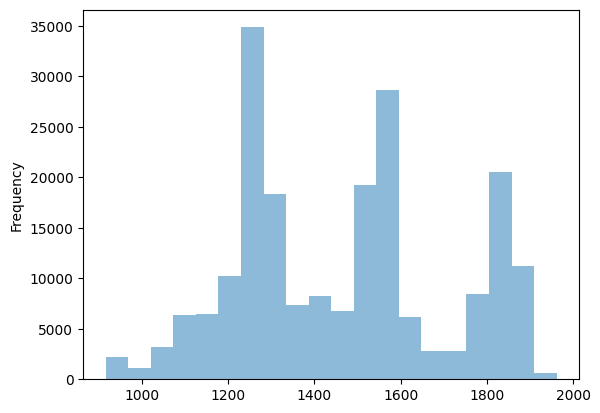

In [142]:
df = df_CSP
column = 'WIDTH'
null_count = df[column].isnull().sum()
has_na_string = (df[column] == 'NA').any()
has_zero = (df[column] == 0).any()
is_numeric = df[column].apply(lambda x: isinstance(x, (int, float)) or pd.isna(x)).all()
is_numeric_dtype = pd.api.types.is_numeric_dtype(df[column])
print(f"Column {column} has null values: {null_count}")
print(f"Column {column} has NA values: {has_na_string}")
print(f"Column {column} has zeros: {has_zero}")
print(f"Column {column} is numeric: {is_numeric}")
print(f"Column {column} has numeric dtype: {is_numeric_dtype}")

#histogram
ax = df[column].plot.hist(bins=20, alpha=0.5)

##### PLTCM

Column INPUT_WIDTH has null values: 0
Column INPUT_WIDTH has NA values: False
Column INPUT_WIDTH has zeros: False
Column INPUT_WIDTH is numeric: True
Column INPUT_WIDTH has numeric dtype: True


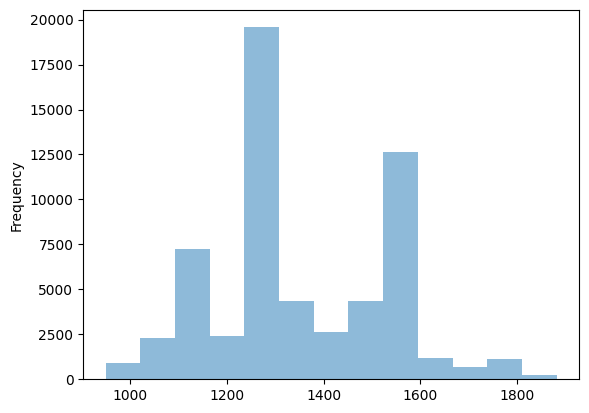

In [137]:
df = df_PLTCM
column = 'INPUT_WIDTH'
null_count = df[column].isnull().sum()
has_na_string = (df[column] == 'NA').any()
has_zero = (df[column] == 0).any()
is_numeric = df[column].apply(lambda x: isinstance(x, (int, float)) or pd.isna(x)).all()
is_numeric_dtype = pd.api.types.is_numeric_dtype(df[column])
print(f"Column {column} has null values: {null_count}")
print(f"Column {column} has NA values: {has_na_string}")
print(f"Column {column} has zeros: {has_zero}")
print(f"Column {column} is numeric: {is_numeric}")
print(f"Column {column} has numeric dtype: {is_numeric_dtype}")

#histogram
ax = df[column].plot.hist(bins=13, alpha=0.5)

##### CGL

Column 4 has null values: 0
Column 4 has NA values: False
Column 4 has zeros: False
Column 4 is numeric: True
Column 4 has numeric dtype: True


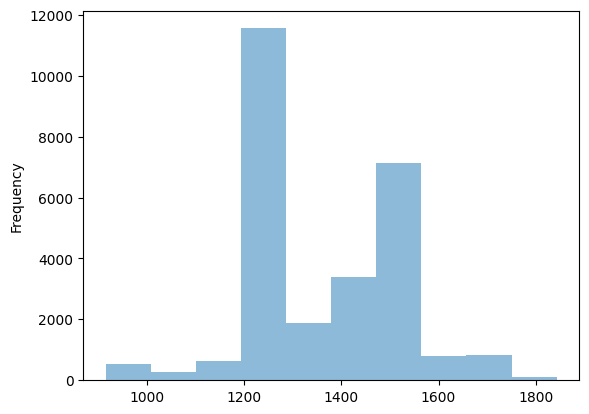

In [ ]:
df = df_CGL
column = 4
null_count = df[column].isnull().sum()
has_na_string = (df[column] == 'NA').any()
has_zero = (df[column] == 0).any()
is_numeric = df[column].apply(lambda x: isinstance(x, (int, float)) or pd.isna(x)).all()
is_numeric_dtype = pd.api.types.is_numeric_dtype(df[column])
print(f"Column {column} has null values: {null_count}")
print(f"Column {column} has NA values: {has_na_string}")
print(f"Column {column} has zeros: {has_zero}")
print(f"Column {column} is numeric: {is_numeric}")
print(f"Column {column} has numeric dtype: {is_numeric_dtype}")

#histogram
ax = df[column].plot.hist(bins=10, alpha=0.5)

#### Thickness Feature

##### CSP

Column THICKNESS has null values: 0
Column THICKNESS has NA values: False
Column THICKNESS has zeros: False
Column THICKNESS is numeric: True
Column THICKNESS has numeric dtype: True


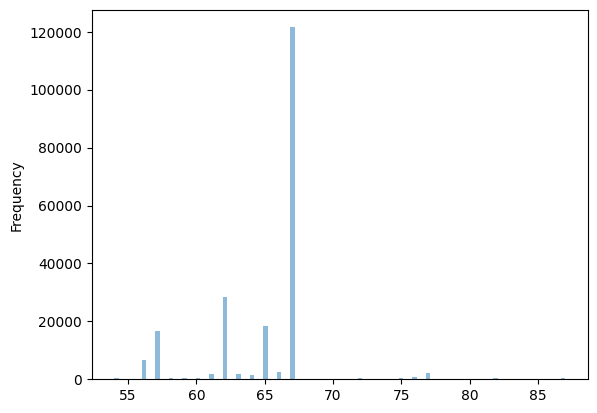

In [143]:
df = df_CSP
column = 'THICKNESS'
null_count = df[column].isnull().sum()
has_na_string = (df[column] == 'NA').any()
has_zero = (df[column] == 0).any()
is_numeric = df[column].apply(lambda x: isinstance(x, (int, float)) or pd.isna(x)).all()
is_numeric_dtype = pd.api.types.is_numeric_dtype(df[column])
print(f"Column {column} has null values: {null_count}")
print(f"Column {column} has NA values: {has_na_string}")
print(f"Column {column} has zeros: {has_zero}")
print(f"Column {column} is numeric: {is_numeric}")
print(f"Column {column} has numeric dtype: {is_numeric_dtype}")

#histogram
ax = df[column].plot.hist(bins=100, alpha=0.5)

##### PLTCM

Column INPUT_THICKNESS has null values: 0
Column INPUT_THICKNESS has NA values: False
Column INPUT_THICKNESS has zeros: False
Column INPUT_THICKNESS is numeric: True
Column INPUT_THICKNESS has numeric dtype: True


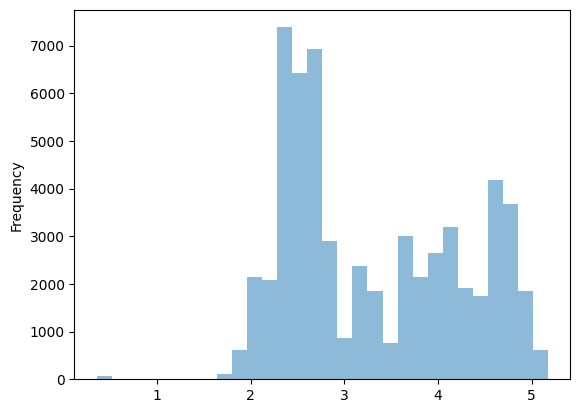

In [139]:
df = df_PLTCM
column = 'INPUT_THICKNESS'
null_count = df[column].isnull().sum()
has_na_string = (df[column] == 'NA').any()
has_zero = (df[column] == 0).any()
is_numeric = df[column].apply(lambda x: isinstance(x, (int, float)) or pd.isna(x)).all()
is_numeric_dtype = pd.api.types.is_numeric_dtype(df[column])
print(f"Column {column} has null values: {null_count}")
print(f"Column {column} has NA values: {has_na_string}")
print(f"Column {column} has zeros: {has_zero}")
print(f"Column {column} is numeric: {is_numeric}")
print(f"Column {column} has numeric dtype: {is_numeric_dtype}")

#histogram
ax = df[column].plot.hist(bins=30, alpha=0.5)

##### CGL

Column 5 has null values: 0
Column 5 has NA values: False
Column 5 has zeros: False
Column 5 is numeric: True
Column 5 has numeric dtype: True


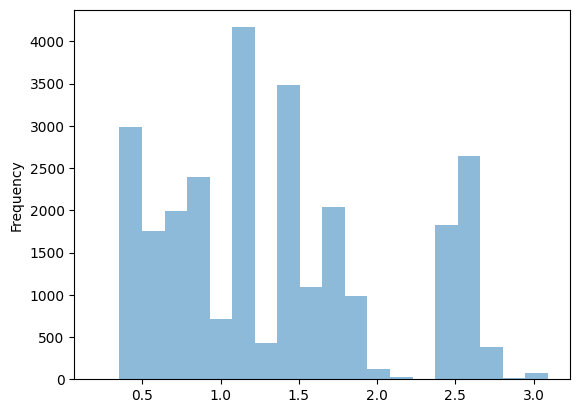

In [ ]:
df = df_CGL
column = 5
null_count = df[column].isnull().sum()
has_na_string = (df[column] == 'NA').any()
has_zero = (df[column] == 0).any()
is_numeric = df[column].apply(lambda x: isinstance(x, (int, float)) or pd.isna(x)).all()
is_numeric_dtype = pd.api.types.is_numeric_dtype(df[column])
print(f"Column {column} has null values: {null_count}")
print(f"Column {column} has NA values: {has_na_string}")
print(f"Column {column} has zeros: {has_zero}")
print(f"Column {column} is numeric: {is_numeric}")
print(f"Column {column} has numeric dtype: {is_numeric_dtype}")

#histogram
ax = df[column].plot.hist(bins=20, alpha=0.5)
#df[df[column] < 100][column]